In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns

import sys
sys.path.append('E:/Рабочий стол С/python_projects/carpov_courses_python')

import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings

def set_visualization_settings():

    plt.style.use('dark_background')

    mlp.rcParams['lines.linewidth'] = 2

    mlp.rcParams['xtick.major.size'] = 12
    mlp.rcParams['xtick.major.width'] = 2
    mlp.rcParams['xtick.labelsize'] = 10
    mlp.rcParams['xtick.color'] = '#FF5533'

    mlp.rcParams['ytick.major.size'] = 12
    mlp.rcParams['ytick.major.width'] = 2
    mlp.rcParams['ytick.labelsize'] = 10
    mlp.rcParams['ytick.color'] = '#FF5533'

    mlp.rcParams['axes.labelsize'] = 10
    mlp.rcParams['axes.titlesize'] = 16
    mlp.rcParams['axes.titlecolor'] = '#00B050'
    mlp.rcParams['axes.labelcolor'] = '#00B050'

    warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('../data/processed_segmentation.xlsx')
df

Age  Work_Experience  Family_Size Segmentation  Gender_Male  \
0      22         1.000000          4.0            D            1   
1      38         2.641663          3.0            A            0   
2      67         1.000000          1.0            B            0   
3      67         0.000000          2.0            B            1   
4      40         2.641663          6.0            A            0   
...   ...              ...          ...          ...          ...   
8063   22         0.000000          7.0            D            1   
8064   35         3.000000          4.0            D            1   
8065   33         1.000000          1.0            D            0   
8066   27         1.000000          4.0            B            0   
8067   37         0.000000          3.0            B            1   

      Ever_Married_Yes  Graduated_Yes  Profession_B  Profession_C  \
0                    0              0      0.075826      0.109610   
1                    1              1      0.270386      0.107296   
2                    1              1      0.270386      0.107296   
3                    1              1      0.253612      0.224719   
4                    1              1      0.232877      0.155954   
...                ...            ...           ...           ...   
8063                 0              0      0.294697      0.410227   
8064                 0              0      0.305509      0.292154   
8065                 0              1      0.075826      0.109610   
8066                 0              1      0.075826      0.109610   
8067                 1              1      0.305509      0.292154   

      Profession_D  Spending_Score_High  Spending_Score_Low   Var_1_B  \
0         0.734985                    0                   1  0.213039   
1         0.251788                    0                   0  0.213039   
2         0.251788                    0                   1  0.234287   
3         0.205457                    1                   0  0.234287   
4         0.226554                    1                   0  0.234287   
...            ...                  ...                 ...       ...   
8063      0.071212                    0                   1  0.195489   
8064      0.193656                    0                   1  0.213039   
8065      0.734985                    0                   1  0.234287   
8066      0.734985                    0                   1  0.234287   
8067      0.193656                    0                   0  0.213039   

       Var_1_C   Var_1_D  
0     0.100092  0.381084  
1     0.100092  0.381084  
2     0.285472  0.248400  
3     0.285472  0.248400  
4     0.285472  0.248400  
...        ...       ...  
8063  0.195489  0.375940  
8064  0.100092  0.381084  
8065  0.285472  0.248400  
8066  0.285472  0.248400  
8067  0.100092  0.381084  

[8068 rows x 15 columns]

In [3]:
X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

### PCA Анализ

In [4]:
### Центрируем данные 

X = X.subtract(X.mean())

X.head()

Age  Work_Experience  Family_Size  Gender_Male  Ever_Married_Yes  \
0 -21.466906        -1.641663     1.149877     0.452529         -0.592836   
1  -5.466906         0.000000     0.149877    -0.547471          0.407164   
2  23.533094        -1.641663    -1.850123    -0.547471          0.407164   
3  23.533094        -2.641663    -0.850123     0.452529          0.407164   
4  -3.466906         0.000000     3.149877    -0.547471          0.407164   

   Graduated_Yes  Profession_B  Profession_C  Profession_D  \
0      -0.625434     -0.154467     -0.134565      0.453874   
1       0.374566      0.040094     -0.136878     -0.029322   
2       0.374566      0.040094     -0.136878     -0.029322   
3       0.374566      0.023319     -0.019455     -0.075653   
4       0.374566      0.002584     -0.088221     -0.054556   

   Spending_Score_High  Spending_Score_Low   Var_1_B   Var_1_C   Var_1_D  
0            -0.150719            0.395389 -0.017253 -0.144083  0.099973  
1            -0.150719           -0.604611 -0.017253 -0.144083  0.099973  
2            -0.150719            0.395389  0.003994  0.041298 -0.032710  
3             0.849281           -0.604611  0.003994  0.041298 -0.032710  
4             0.849281           -0.604611  0.003994  0.041298 -0.032710

In [5]:
### Проверка - сумма должна быть приимерно равна нулю, это значит, что мы примерно отцентрировали признаки

X.sum()

Age                    9.094947e-12
Work_Experience       -1.122658e-12
Family_Size           -5.826450e-13
Gender_Male           -1.634248e-13
Ever_Married_Yes       1.421085e-14
Graduated_Yes          3.268497e-13
Profession_B          -1.580958e-13
Profession_C          -1.012523e-13
Profession_D          -1.953993e-14
Spending_Score_High    1.740830e-13
Spending_Score_Low     1.953993e-13
Var_1_B               -2.635669e-13
Var_1_C                1.089129e-13
Var_1_D               -4.907186e-14
dtype: float64

In [6]:
### Разлоржим матрицу X на 2 главные компоненты

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset


PCA_1     PCA_2
0    -21.432870 -2.458720
1     -5.450097 -0.185937
2     23.612201 -0.704385
3     23.643254 -1.775789
4     -3.518230 -0.315505
...         ...       ...
8063 -21.465477 -3.649337
8064  -8.516026 -0.018887
8065 -10.366329 -1.864995
8066 -16.432833 -2.267166
8067  -6.352486 -2.861909

[8068 rows x 2 columns]

In [7]:
### Что содержится в новых признаках 

first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

PCA_1     PCA_2
Age                  0.999976  0.006465
Work_Experience     -0.185781  0.982151
Family_Size         -0.274496 -0.140078
Gender_Male          0.030516 -0.055113
Ever_Married_Yes     0.557175  0.011474
Graduated_Yes        0.235837  0.082300
Profession_B         0.457619  0.080925
Profession_C         0.281130  0.034265
Profession_D        -0.454462 -0.076540
Spending_Score_High  0.360744  0.000941
Spending_Score_Low  -0.365928  0.000604
Var_1_B              0.091862  0.060102
Var_1_C              0.167633  0.071166
Var_1_D             -0.180199 -0.072944

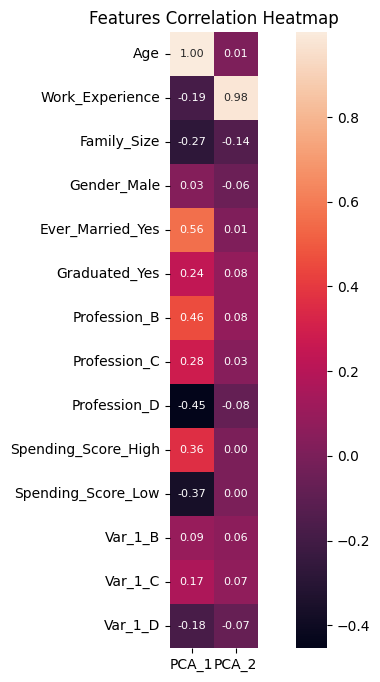

In [8]:
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(corrs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=corrs.index, xticklabels=corrs.columns)
plt.title('Features Correlation Heatmap')
plt.show()

In [9]:
### Сконкатим с таргетом 

PCA_dataset = pd.concat((PCA_dataset, Y), axis=1)
PCA_dataset

PCA_1     PCA_2 Segmentation
0    -21.432870 -2.458720            D
1     -5.450097 -0.185937            A
2     23.612201 -0.704385            B
3     23.643254 -1.775789            B
4     -3.518230 -0.315505            A
...         ...       ...          ...
8063 -21.465477 -3.649337            D
8064  -8.516026 -0.018887            D
8065 -10.366329 -1.864995            D
8066 -16.432833 -2.267166            B
8067  -6.352486 -2.861909            B

[8068 rows x 3 columns]

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

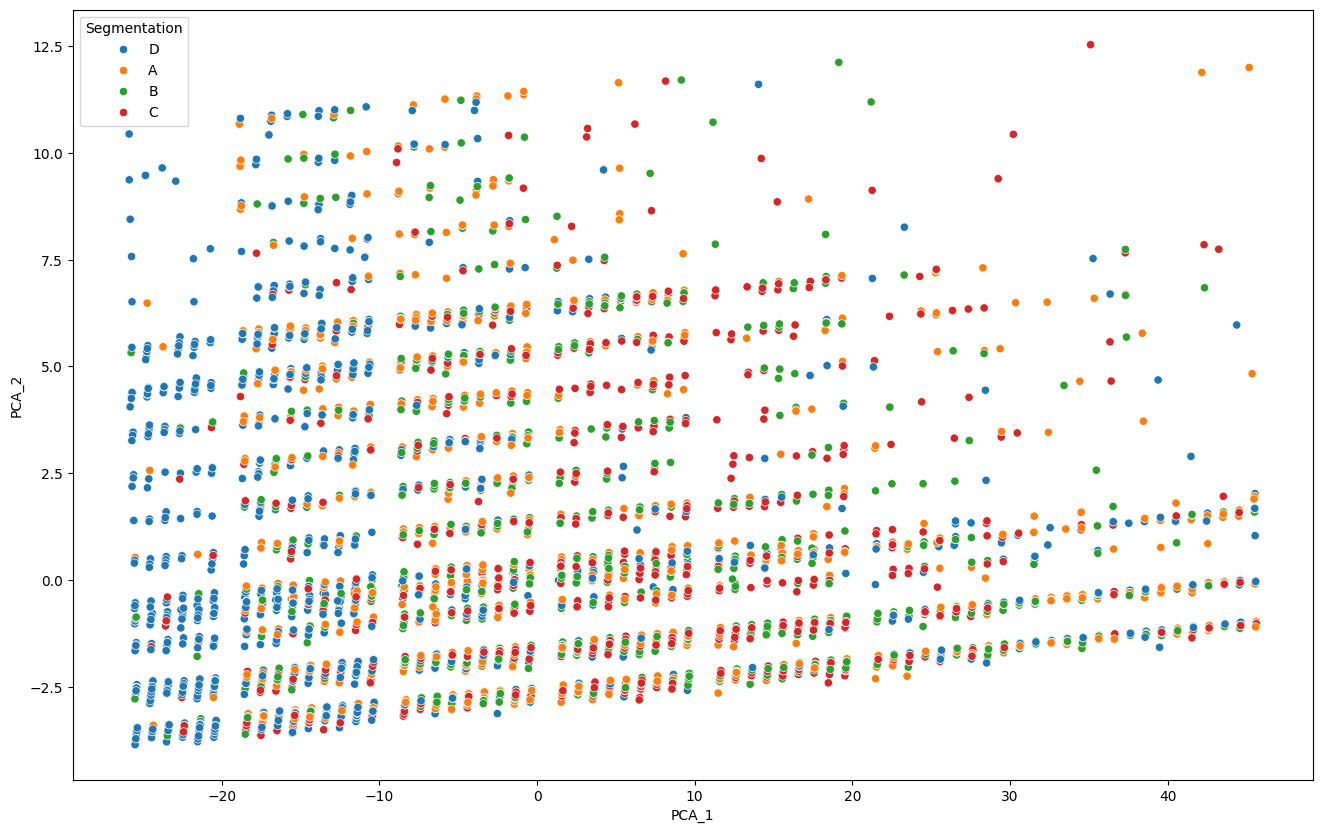

In [10]:
import seaborn as sns 

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=PCA_dataset, x="PCA_1", y="PCA_2", hue="Segmentation")

In [11]:
### Првоедем тоже самое для 3 компонент!

pca_3d = PCA(n_components=3)

pca_3d.fit(X)

PCA_dataset_3d = pca_3d.transform(X)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

PCA_1     PCA_2     PCA_3
0 -21.432870 -2.458720  0.481023
1  -5.450097 -0.185937  0.037264
2  23.612201 -0.704385 -1.401751
3  23.643254 -1.775789 -0.327444
4  -3.518230 -0.315505  3.097162

In [12]:
### Что содержится в новых признаках 

first_component_corr = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr = X.corrwith(PCA_dataset_3d.PCA_3)


corrs = pd.concat((first_component_corr, second_component_corr, third_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs

PCA_1     PCA_2     PCA_3
Age                  0.999976  0.006465  0.002189
Work_Experience     -0.185781  0.982151  0.029322
Family_Size         -0.274496 -0.140078  0.950478
Gender_Male          0.030516 -0.055113  0.069506
Ever_Married_Yes     0.557175  0.011474  0.105692
Graduated_Yes        0.235837  0.082300 -0.170059
Profession_B         0.457619  0.080925 -0.077093
Profession_C         0.281130  0.034265 -0.089120
Profession_D        -0.454462 -0.076540  0.110584
Spending_Score_High  0.360744  0.000941  0.166439
Spending_Score_Low  -0.365928  0.000604 -0.253785
Var_1_B              0.091862  0.060102 -0.083168
Var_1_C              0.167633  0.071166 -0.143730
Var_1_D             -0.180199 -0.072944  0.150496

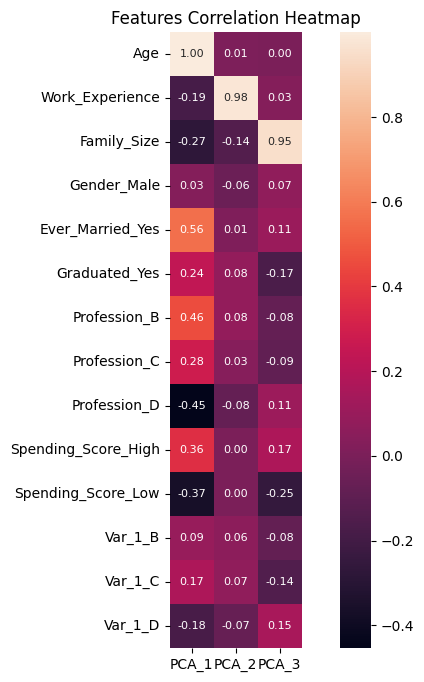

In [13]:
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(corrs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=corrs.index, xticklabels=corrs.columns)
plt.title('Features Correlation Heatmap')
plt.show()

In [14]:
### Сконкатим с таргетом 

PCA_dataset_3d = pd.concat((PCA_dataset_3d, Y), axis=1)
PCA_dataset_3d

PCA_1     PCA_2     PCA_3 Segmentation
0    -21.432870 -2.458720  0.481023            D
1     -5.450097 -0.185937  0.037264            A
2     23.612201 -0.704385 -1.401751            B
3     23.643254 -1.775789 -0.327444            B
4     -3.518230 -0.315505  3.097162            A
...         ...       ...       ...          ...
8063 -21.465477 -3.649337  3.369814            D
8064  -8.516026 -0.018887  0.930946            D
8065 -10.366329 -1.864995 -2.292746            D
8066 -16.432833 -2.267166  0.524987            B
8067  -6.352486 -2.861909 -0.140416            B

[8068 rows x 4 columns]

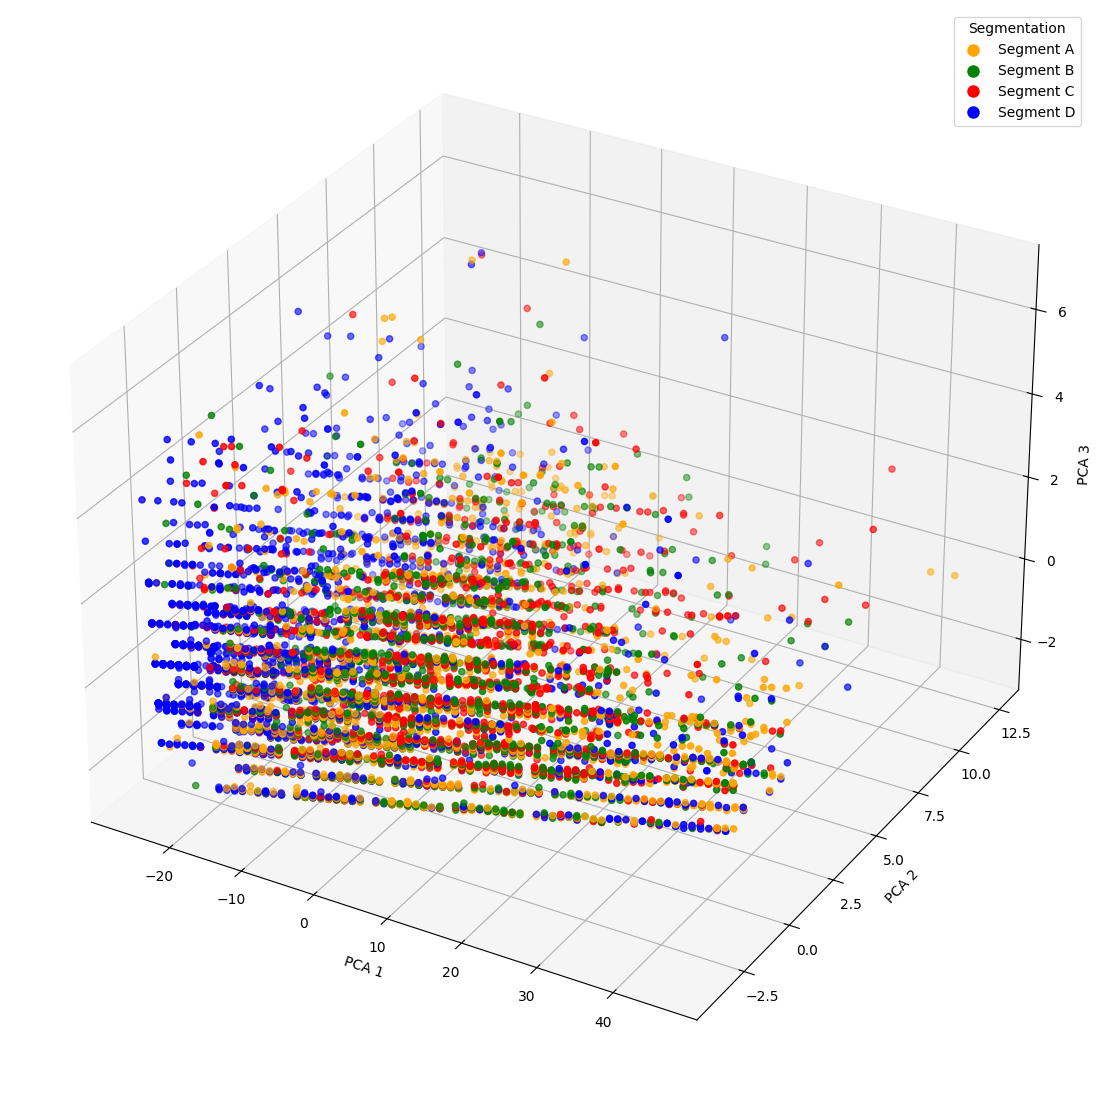

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

# Устанавливаем цвета точек в соответствии с метками классов
colors = PCA_dataset_3d['Segmentation'].replace(['A', 'B', 'C', 'D'],
                                                ['orange', 'green', 'red', 'blue'])

# Рисуем точки на графике
ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'], 
             PCA_dataset_3d['PCA_3'],
             c=colors)

# Добавляем подписи к осям
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Создаем список объектов Line2D для легенды
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Segment A', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Segment B', markerfacecolor='green', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Segment C', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Segment D', markerfacecolor='blue', markersize=10)]

# Добавляем легенду
ax.legend(handles=legend_elements, loc='best', title='Segmentation')

# Отображаем график
plt.show()

In [16]:
ix = df.drop('Segmentation', axis=1)

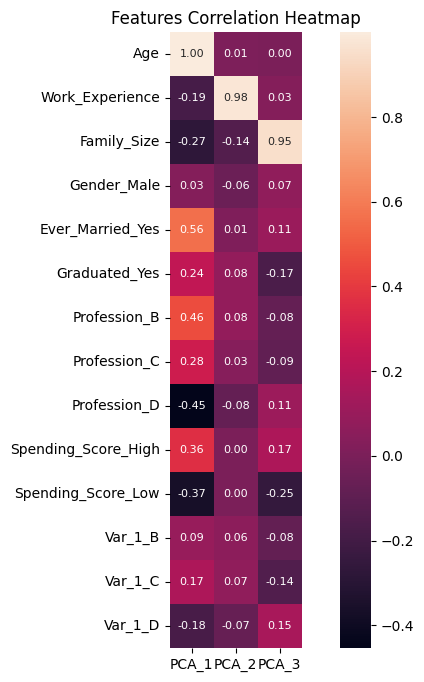

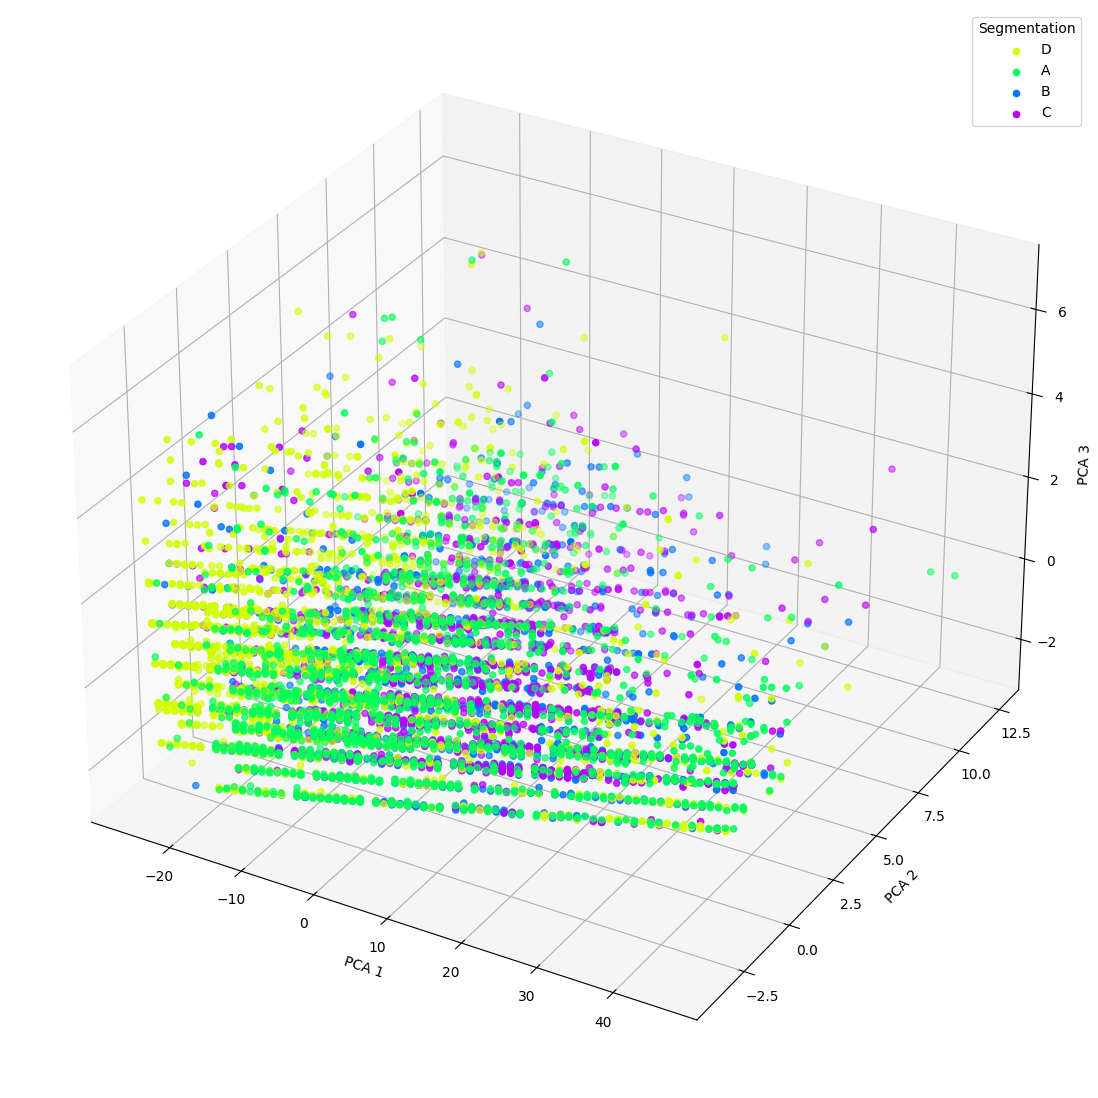

In [17]:
from library.visualization.PCA import PCAResultVisualizer

pcv_3 = PCAResultVisualizer(ix, Y, n_components=3)
pcv_3.plot_correlation_heatmap()
pcv_3.plot_PCA()

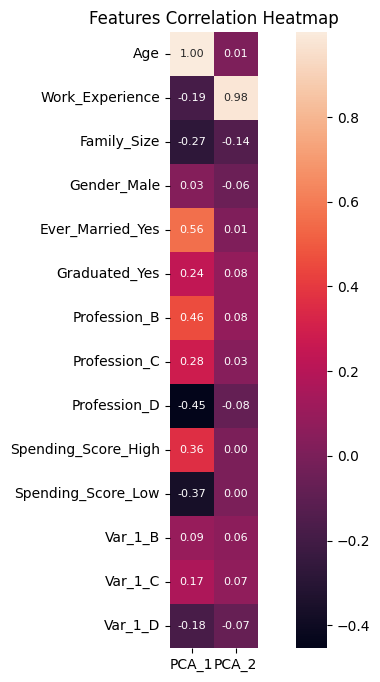

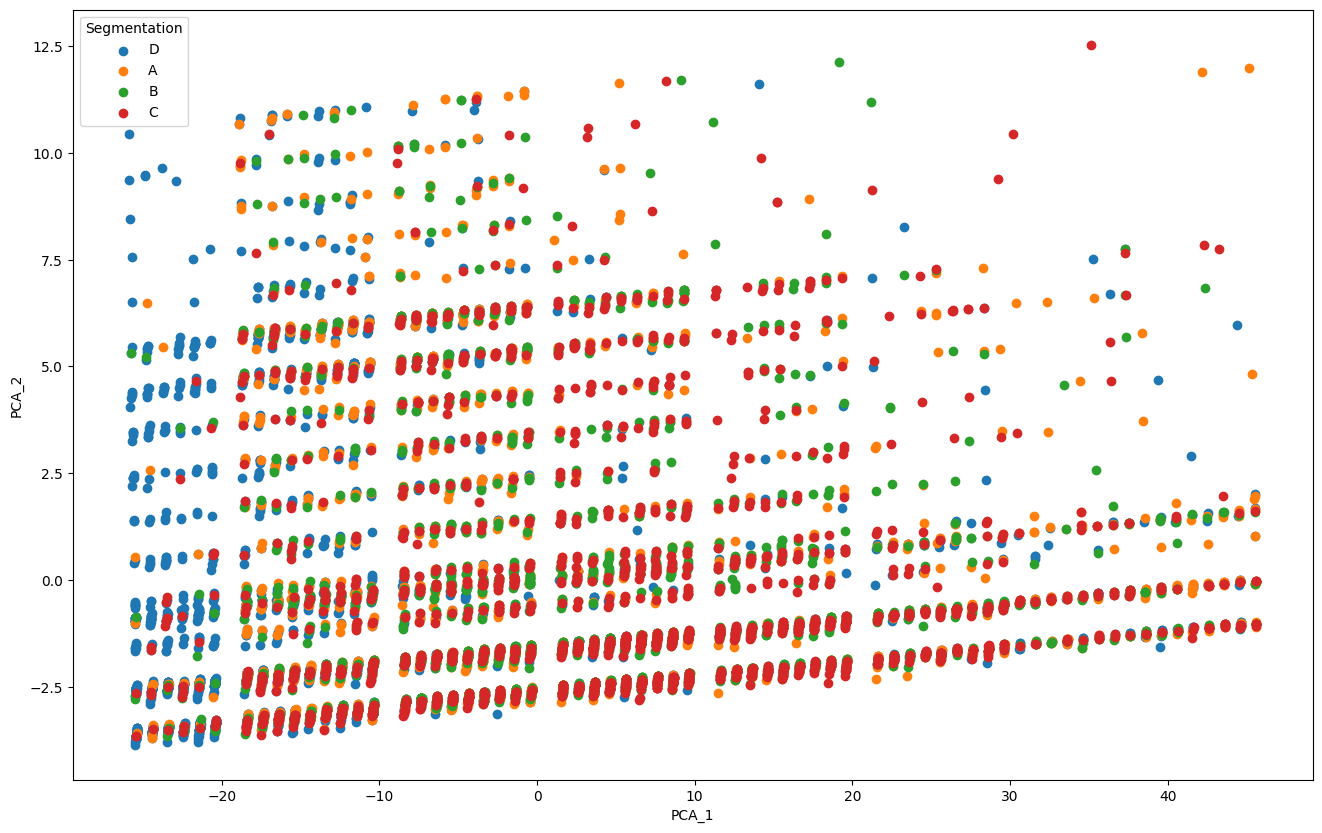

In [18]:
pcv_2 = PCAResultVisualizer(ix, Y, n_components=2)
pcv_2.plot_correlation_heatmap()
pcv_2.plot_PCA()

### TSNE

In [19]:
# Здесь необходимости центрировать данные нет 

X = df.drop("Segmentation", axis=1)
Y = df["Segmentation"]

In [20]:
### Произведем TSNE преобразование 

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne

array([[-85.006966  ,  11.786614  ],
       [ -2.000714  ,  15.779938  ],
       [ 42.2786    ,  10.327858  ],
       ...,
       [-15.18244   , -48.91364   ],
       [-64.685684  , -34.118195  ],
       [-11.093275  ,   0.16203229]], dtype=float32)

In [21]:
X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1, 1)), axis=1)
X_tsne = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2', 'SEGMENT'])

<Axes: xlabel='TSNE_1', ylabel='TSNE_2'>

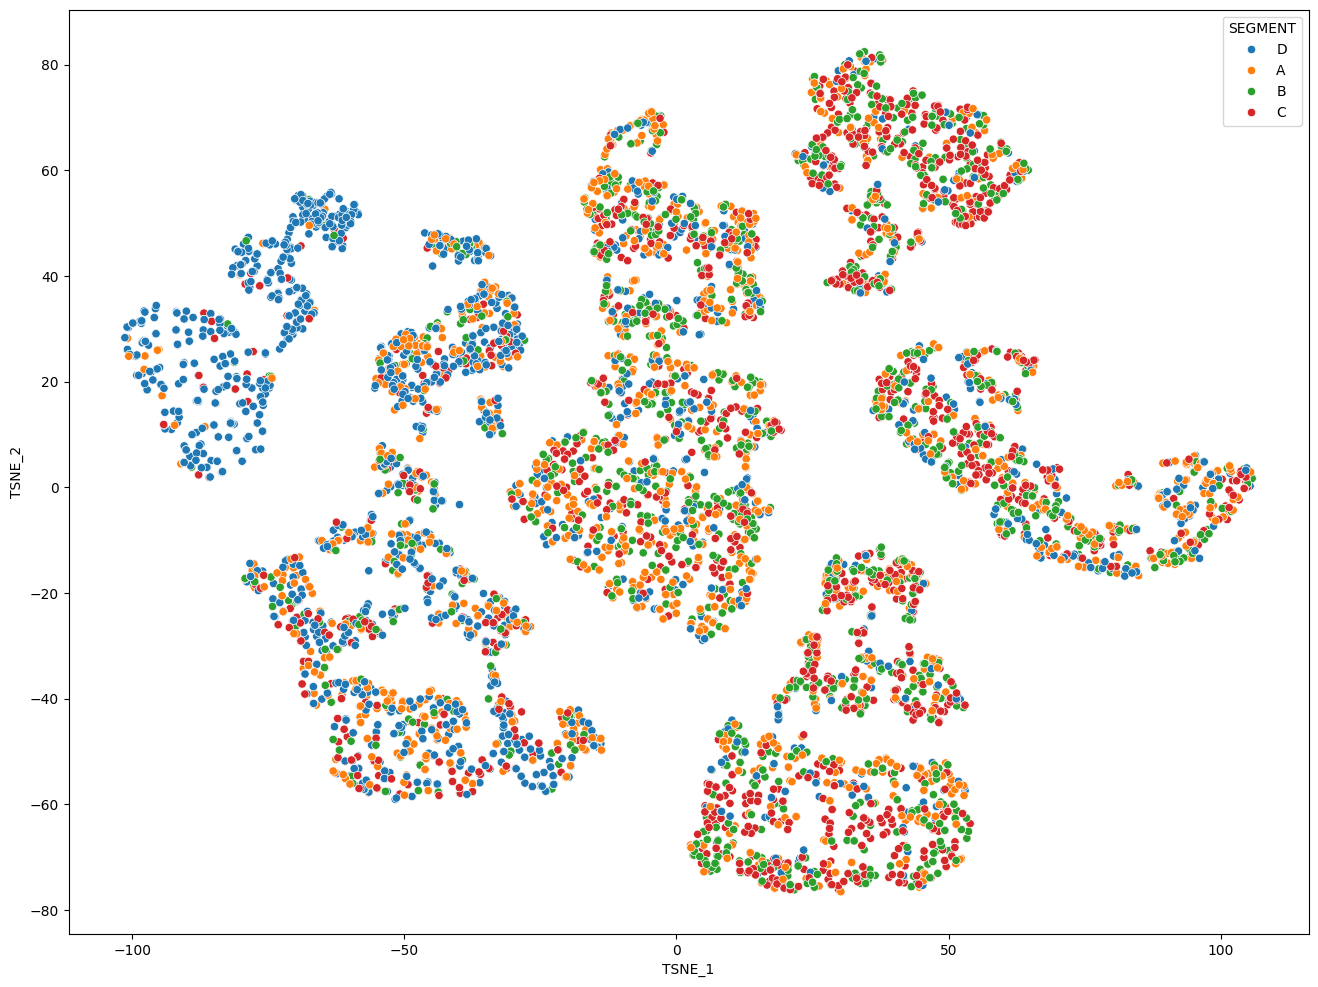

In [22]:
fig = plt.figure()
fig.set_size_inches(16, 12)

sns.scatterplot(data=X_tsne, x="TSNE_1", y="TSNE_2", hue="SEGMENT")

In [23]:
X_tsne_3d = TSNE(n_components=3).fit_transform(X)

X_tsne_3d

array([[-25.46123   ,  -0.45469943,  -3.7814689 ],
       [ -2.3403792 ,   1.8377805 , -13.106708  ],
       [ 14.919323  ,  -3.7799084 , -17.127354  ],
       ...,
       [ -4.038925  , -13.010371  ,   9.23412   ],
       [-14.795416  , -10.417341  ,   0.11272546],
       [ -8.023073  ,  -3.6614203 , -16.906582  ]], dtype=float32)

In [24]:
X_tsne_3d = np.concatenate((X_tsne_3d, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['Tsne_1st_component',
                                             'Tsne_2nd_component',
                                             'Tsne_3rd_component',
                                             'SEGMENT'])

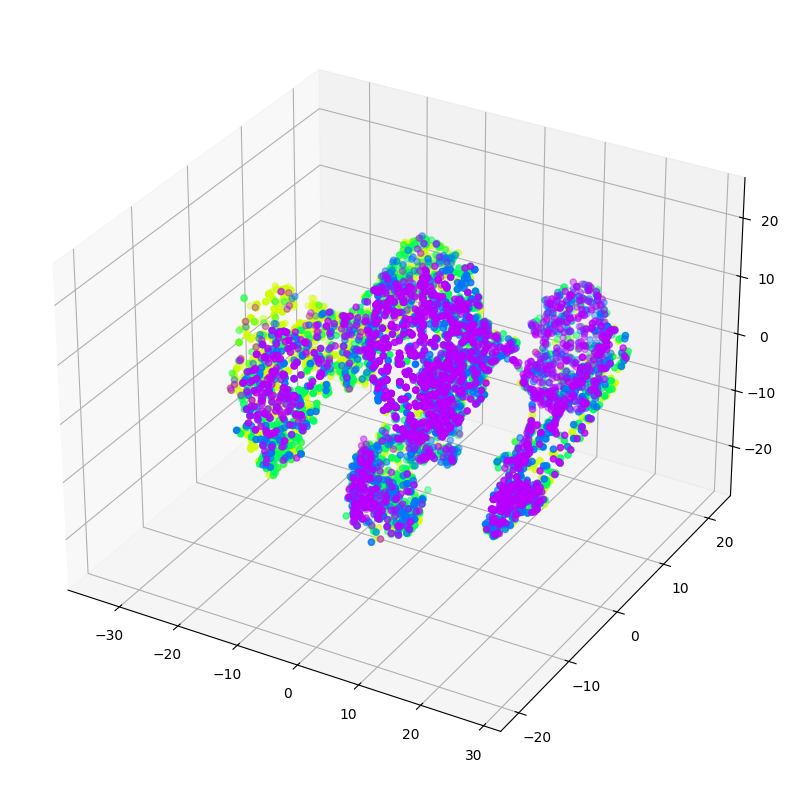

In [25]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

unique_labels = Y.unique()
colors = sns.color_palette('hsv', len(unique_labels))

for label, color in zip(unique_labels, colors):
    subset = X_tsne_3d[X_tsne_3d['SEGMENT'] == label]
    ax.scatter3D(subset['Tsne_1st_component'], 
                    subset['Tsne_2nd_component'], 
                    subset['Tsne_3rd_component'],
                    c=[color],
                    label=label)

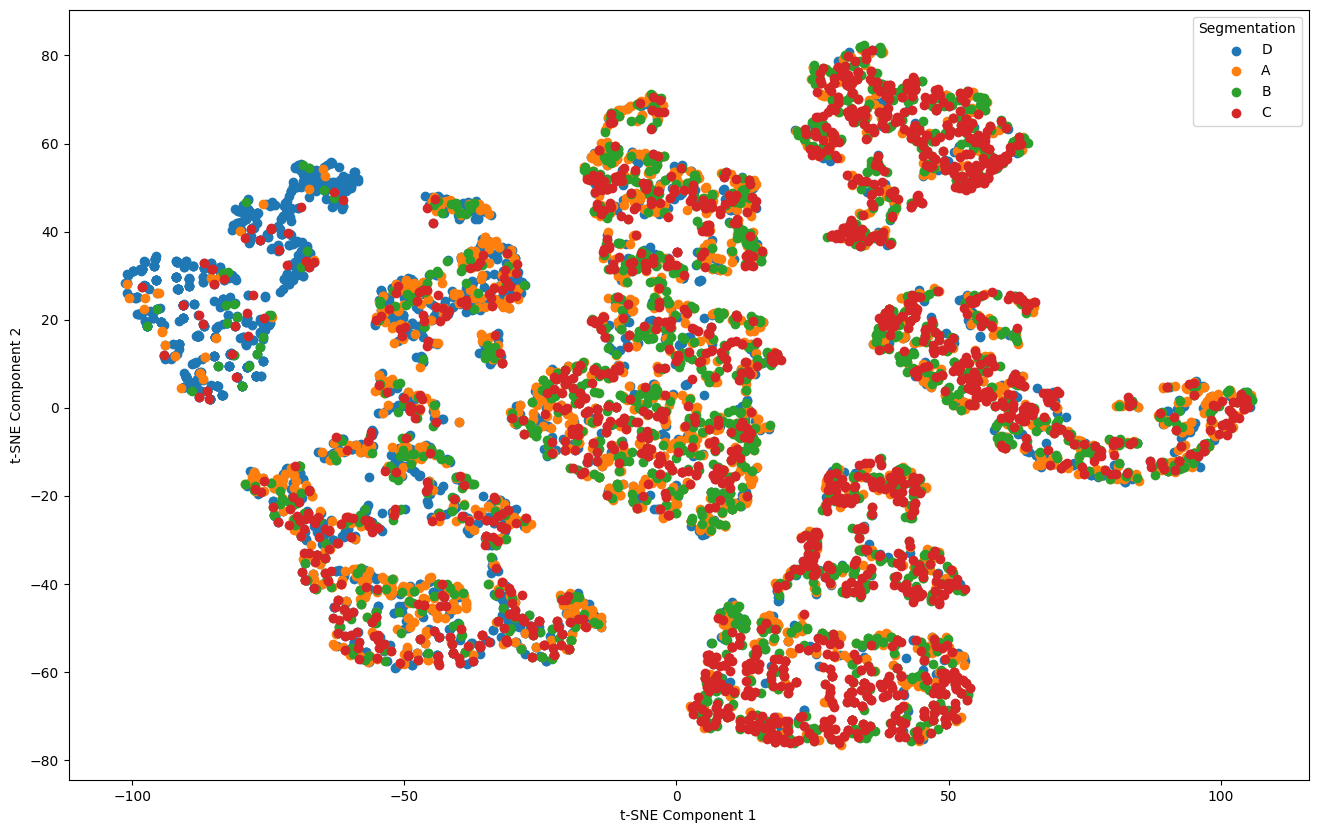

In [26]:
from library.visualization.TSNE import TSNEResultVisualizer

tsne = TSNEResultVisualizer(X, Y, n_components=2)
tsne.plot_TSNE()

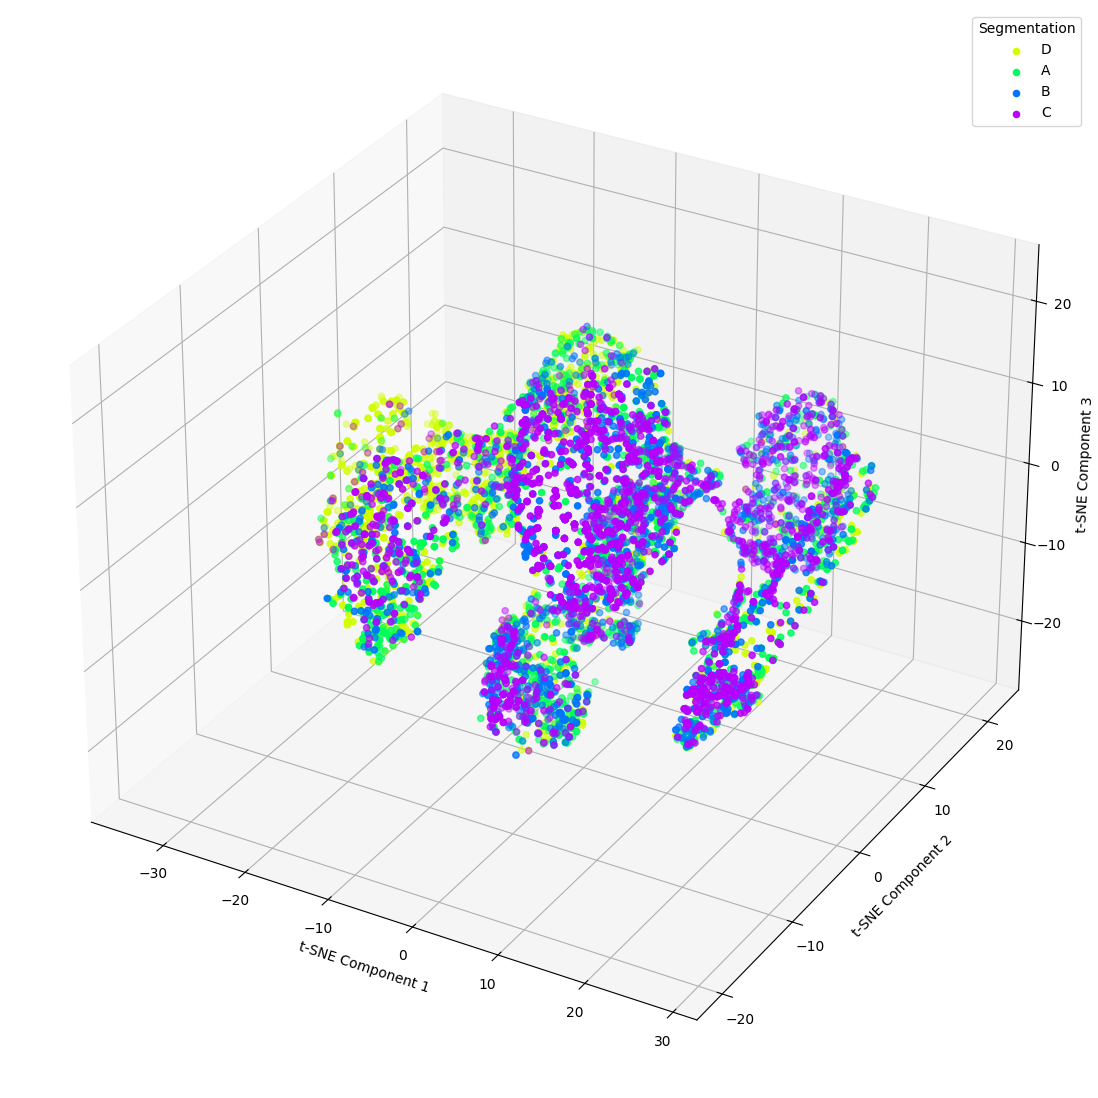

In [27]:
tsne = TSNEResultVisualizer(X, Y, n_components=3)
tsne.plot_TSNE()